In [9]:
from typing import Union
from os.path import basename
from dateutil import parser
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import seaborn as sns
from rasters import Raster
from time_conversion import calculate_hour_of_day
from STIC_sensitivity import process_STIC_table
from PTJPL_sensitivity import process_PTJPL_table
from PTJPL.Topt import load_Topt
from PTJPL.fAPARmax import load_fAPARmax
from SEBAL import process_SEBAL_G_table
from harmonized_landsat_sentinel import HLS2SentinelGranule
from sensitivity import perturbed_run, joint_perturbed_run
from evapotranspiration_conversion import process_daily_ET_table
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [11]:
ST_C_filename = "ECOSTRESS_example_rasters/ECOv002_L2T_LSTE_21485_013_11SPS_20220420T211350_0601_01_LST.tif"
ST_C = Raster.open(ST_C_filename) - 273.15
# ST_C

[2024-12-18 08:36:33 WARNING] CPLE_AppDefined in PROJ: proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2024-12-18 08:36:33 WARNING] CPLE_AppDefined in The definition of projected CRS EPSG:32611 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
[2024-12-18 08:36:33 WARNING] CPLE_AppDefined in PROJ: proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2024-12-18 08:36:33 WARNING] CPLE_AppDefined in The definition of projected CRS EPSG:3

In [12]:
geometry = ST_C.geometry
# geometry

In [13]:
time_UTC = parser.parse(basename(ST_C_filename).split("_")[6])
# time_UTC

In [14]:
doy = time_UTC.timetuple().tm_yday
# doy

In [15]:
hour_of_day = calculate_hour_of_day(time_UTC, geometry=geometry)
# hour_of_day

In [18]:
emissivity_filename = "../ET-Sensitivity-internal/example_ECOSTRESS_input/ECOv002_L2T_LSTE_21485_013_11SPS_20220420T211350_0601_01/ECOv002_L2T_LSTE_21485_013_11SPS_20220420T211350_0601_01_EmisWB.tif"
emissivity = Raster.open(emissivity_filename)
# emissivity

[2024-12-18 08:37:36 WARNING] CPLE_AppDefined in PROJ: proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2024-12-18 08:37:36 WARNING] CPLE_AppDefined in The definition of projected CRS EPSG:32611 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
[2024-12-18 08:37:36 WARNING] CPLE_AppDefined in PROJ: proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2024-12-18 08:37:36 WARNING] CPLE_AppDefined in The definition of projected CRS EPSG:3

In [19]:
sentinel = HLS2SentinelGranule("../ET-Sensitivity-internal/example_ECOSTRESS_input/HLS.S30.T11SPS.2022110T181909.v2.0")
# sentinel

In [21]:
NIR = sentinel.NIR.to_geometry(geometry)
# NIR

In [22]:
red = sentinel.red.to_geometry(geometry)
# red

In [23]:
albedo_filename = "ECOSTRESS_example_rasters/ECOv002_L2T_STARS_21485_013_11SPS_20220420_0700_01_albedo.tif"
albedo = Raster.open(albedo_filename)
# albedo

[2024-12-18 08:37:55 WARNING] CPLE_AppDefined in PROJ: proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2024-12-18 08:37:55 WARNING] CPLE_AppDefined in The definition of projected CRS EPSG:32611 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
[2024-12-18 08:37:55 WARNING] CPLE_AppDefined in PROJ: proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2024-12-18 08:37:55 WARNING] CPLE_AppDefined in The definition of projected CRS EPSG:3

In [24]:
Ta_C_filename = "ECOSTRESS_example_rasters/ECOv002_L3T_MET_21485_013_11SPS_20220420T211350_0700_01_Ta.tif"
Ta_C = Raster.open(Ta_C_filename)
# Ta_C

[2024-12-18 08:38:01 WARNING] CPLE_AppDefined in PROJ: proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2024-12-18 08:38:01 WARNING] CPLE_AppDefined in The definition of projected CRS EPSG:32611 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
[2024-12-18 08:38:01 WARNING] CPLE_AppDefined in PROJ: proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2024-12-18 08:38:01 WARNING] CPLE_AppDefined in The definition of projected CRS EPSG:3

In [25]:
RH_filename = "ECOSTRESS_example_rasters/ECOv002_L3T_MET_21485_013_11SPS_20220420T211350_0700_01_RH.tif"
RH = Raster.open(RH_filename)
# RH

[2024-12-18 08:38:06 WARNING] CPLE_AppDefined in PROJ: proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2024-12-18 08:38:06 WARNING] CPLE_AppDefined in The definition of projected CRS EPSG:32611 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
[2024-12-18 08:38:06 WARNING] CPLE_AppDefined in PROJ: proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2024-12-18 08:38:06 WARNING] CPLE_AppDefined in The definition of projected CRS EPSG:3

In [26]:
Rn_filename = "ECOSTRESS_example_rasters/ECOv002_L3T_SEB_21485_013_11SPS_20220420T211350_0700_01_Rn.tif"
Rn = Raster.open(Rn_filename)
# Rn

[2024-12-18 08:38:10 WARNING] CPLE_AppDefined in PROJ: proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2024-12-18 08:38:10 WARNING] CPLE_AppDefined in The definition of projected CRS EPSG:32611 got from GeoTIFF keys is not the same as the one from the EPSG registry, which may cause issues during reprojection operations. Set GTIFF_SRS_SOURCE configuration option to EPSG to use official parameters (overriding the ones from GeoTIFF keys), or to GEOKEYS to use custom values from GeoTIFF keys and drop the EPSG code.
[2024-12-18 08:38:10 WARNING] CPLE_AppDefined in PROJ: proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2024-12-18 08:38:10 WARNING] CPLE_AppDefined in The definition of projected CRS EPSG:3

In [31]:
Rg_filename = "example_ECOSTRESS_input/ECOv002_L3T_SEB_21485_013_11SPS_20220420T211350_0700_01/ECOv002_L3T_SEB_21485_013_11SPS_20220420T211350_0700_01_Rg.tif"
Rg = Raster.open(Rg_filename)
# Rg

OSError: raster file not found: example_ECOSTRESS_input/ECOv002_L3T_SEB_21485_013_11SPS_20220420T211350_0700_01/ECOv002_L3T_SEB_21485_013_11SPS_20220420T211350_0700_01_Rg.tif

In [29]:
Topt = load_Topt(geometry)
# Topt

[2024-12-18 08:38:31 WARNING] CPLE_AppDefined in PROJ: proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2024-12-18 08:38:31 WARNING] CPLE_AppDefined in PROJ: proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [32]:
fAPARmax = load_fAPARmax(geometry)
# fAPARmax

[2024-12-18 08:38:53 WARNING] CPLE_AppDefined in PROJ: proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
[2024-12-18 08:38:53 WARNING] CPLE_AppDefined in PROJ: proj_create_from_database: /Users/Maggiej/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


In [33]:
def reflectance_to_NDVI(NIR: Union[Raster, np.ndarray], red: Union[Raster, np.ndarray]) -> Union[Raster, np.ndarray]:
    return (NIR - red) / (NIR + red)

def reflectance_to_NDVI_table(input_df: pd.DataFrame) -> pd.DataFrame:
    NIR = input_df["NIR"]
    red = input_df["red"]
    NDVI = reflectance_to_NDVI(NIR, red)
    output_df = input_df.copy()
    output_df["NDVI"] = NDVI

    return output_df

def reflectance_to_PTJPL(input_df: pd.DataFrame) -> pd.DataFrame:
    return process_PTJPL_table(process_SEBAL_G_table(reflectance_to_NDVI_table(input_df)))

def reflectance_to_PTJPL_ET(input_df: pd.DataFrame) -> pd.DataFrame:
    return process_daily_ET_table(process_PTJPL_table(process_SEBAL_G_table(reflectance_to_NDVI_table(input_df))))

def reflectance_to_STIC(input_df: pd.DataFrame) -> pd.DataFrame:
    return process_STIC_table(process_SEBAL_G_table(reflectance_to_NDVI_table(input_df)))

def reflectance_to_STIC_ET(input_df: pd.DataFrame) -> pd.DataFrame:
    return process_daily_ET_table(process_STIC_table(process_SEBAL_G_table(reflectance_to_NDVI_table(input_df))))


In [34]:
input_df = pd.DataFrame({
    "hour_of_day": hour_of_day.flatten(),
    "lat": geometry.lat.flatten(),
    "lon": geometry.lon.flatten(),
    "NIR": NIR.flatten(),
    "red": red.flatten(),
    "ST_C": ST_C.flatten(),
    "EmisWB": emissivity.flatten(),
    "albedo": albedo.flatten(),
    "Ta_C": Ta_C.flatten(),
    "RH": RH.flatten(),
    "Rn": Rn.flatten(),
    # "Rg": Rg.flatten(),
    "Topt": Topt.flatten(),
    "fAPARmax": fAPARmax.flatten()
})

input_df["doy"] = doy

input_df = input_df.dropna()
sample_df = input_df.sample(1000)
sample_df

,hour_of_day,lat,lon,NIR,red,ST_C,EmisWB,albedo,Ta_C,RH,Rn,Topt,fAPARmax,doy
1889009,13.558255,32.664407,-115.084515,0.3912,0.3260,48.929993,0.894,0.212143,31.721588,0.351974,400.804291,19.07,0.2241,110
1044675,13.521287,33.011324,-115.639028,0.3905,0.2293,43.110016,0.954,0.157579,33.174767,0.348875,475.252716,15.44,0.3797,110
2009010,13.521639,32.622974,-115.633745,0.3316,0.2056,47.970001,0.950,0.164024,31.968018,0.351762,431.316895,18.09,0.2680,110
1948331,13.545191,32.643255,-115.280468,0.3803,0.3121,49.130005,0.932,0.213819,32.040569,0.352024,401.460022,20.70,0.2583,110
1405080,13.509420,32.867922,-115.817038,0.4784,0.4185,45.230011,0.920,0.283789,30.445761,0.362007,340.580322,15.65,0.1763,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323731,13.518778,32.899347,-115.676667,0.4086,0.0972,45.089996,0.942,0.142458,34.087551,0.344011,480.989777,21.45,0.2650,110
835084,13.547419,33.091028,-115.247053,0.3965,0.3311,51.809998,0.902,0.223361,31.038055,0.348576,373.024841,23.05,0.1907,110
1124830,13.530591,32.977526,-115.499474,0.4733,0.0564,36.470001,0.972,0.131461,33.720177,0.347389,530.176941,17.44,0.3555,110
513377,13.534224,33.223075,-115.444969,0.3686,0.1996,45.690002,0.954,0.165962,29.741365,0.360166,448.491791,17.60,0.2420,110


In [46]:
input_uncertainty = 0.03
unperturbed_input, perturbed_input_df, perturbed_output_df, results = joint_perturbed_run(
    input_df=sample_df, 
    input_variable=["NIR", "red"], 
    output_variable=["NDVI"], 
    forward_process=reflectance_to_NDVI_table,
    n=100,
    perturbation_mean=np.zeros(2),
    perturbation_cov=np.eye(2) * input_uncertainty ** 2
)

# output_df = output_df[(output_df.NIR_perturbed > 0) & (output_df.NIR_perturbed < 1)]
results

0


,NIR_unperturbed,red_unperturbed,NIR_perturbation,red_perturbation,NIR_perturbation_std,red_perturbation_std,NIR_perturbed,red_perturbed,NDVI_unperturbed,NDVI_perturbation,NDVI_perturbation_std,NDVI_perturbed,id
0,0.3912,0.3260,-0.033424,0.009593,-0.396213,0.095361,0.357776,0.335593,0.090909,-0.058916,-0.240589,0.031993,0
1,0.3912,0.3260,0.033833,-0.029180,0.401052,-0.290078,0.425033,0.296820,0.090909,0.086707,0.354075,0.177616,0
2,0.3912,0.3260,0.064110,0.011634,0.759956,0.115657,0.455310,0.337634,0.090909,0.057494,0.234783,0.148403,0
3,0.3912,0.3260,0.045733,0.009406,0.542115,0.093509,0.436933,0.335406,0.090909,0.040544,0.165565,0.131453,0
4,0.3912,0.3260,0.023232,0.006010,0.275389,0.059746,0.414432,0.332010,0.090909,0.019510,0.079673,0.110420,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.2484,0.2144,-0.046770,-0.058355,-0.554411,-0.580106,0.201630,0.156045,0.073466,0.053981,0.220435,0.127447,999
99996,0.2484,0.2144,0.063609,-0.007764,0.754018,-0.077186,0.312009,0.206636,0.073466,0.129705,0.529661,0.203171,999
99997,0.2484,0.2144,0.053369,0.016184,0.632631,0.160883,0.301769,0.230584,0.073466,0.060252,0.246044,0.133718,999
99998,0.2484,0.2144,0.014081,-0.003930,0.166920,-0.039067,0.262481,0.210470,0.073466,0.036506,0.149074,0.109971,999


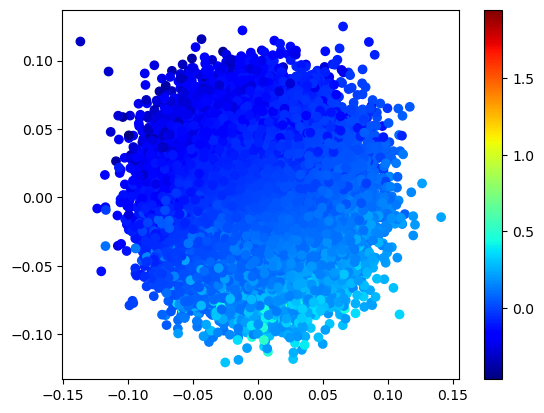

In [55]:
results = results[(results.NIR_perturbed > 0) & (results.NIR_perturbed < 1) & (results.red_perturbed > 0) & (results.red_perturbed < 1)]

plt.scatter(x=results.NIR_perturbation, y=results.red_perturbation, c=results.NDVI_perturbation, cmap='jet')
plt.colorbar()

0.08333465666402218

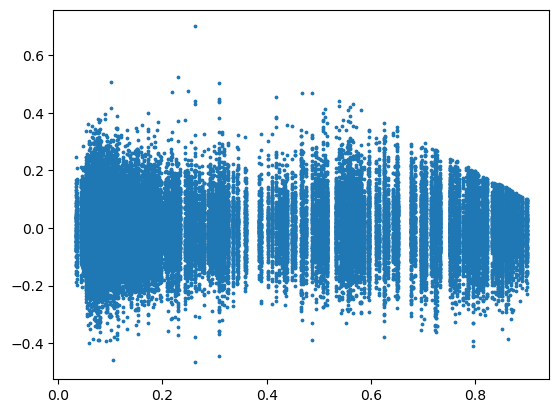

In [60]:
results2 = results[results.NDVI_unperturbed > 0]
plt.scatter(x=results2.NDVI_unperturbed, y=results2.NDVI_perturbation,s=3)
np.std(results2.NDVI_perturbation)

In [62]:
input_uncertainty = 0.03
err_cov = np.array([[1,0.7],[0.7,1]])*0.03**2

unperturbed_input, perturbed_input_df, perturbed_output_df, results = joint_perturbed_run(
    input_df=sample_df, 
    input_variable=["NIR", "red"], 
    output_variable=["NDVI"], 
    forward_process=reflectance_to_NDVI_table,
    n=100,
    perturbation_mean=np.zeros(2),
    perturbation_cov=err_cov
)


0


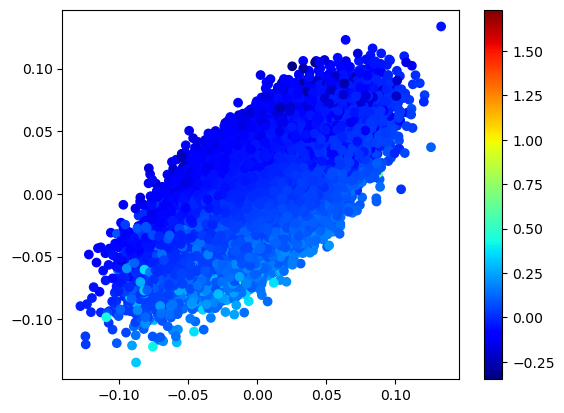

In [63]:
results = results[(results.NIR_perturbed > 0) & (results.NIR_perturbed < 1) & (results.red_perturbed > 0) & (results.red_perturbed < 1)]

plt.scatter(x=results.NIR_perturbation, y=results.red_perturbation, c=results.NDVI_perturbation, cmap='jet')
plt.colorbar()

0.055036181132672155

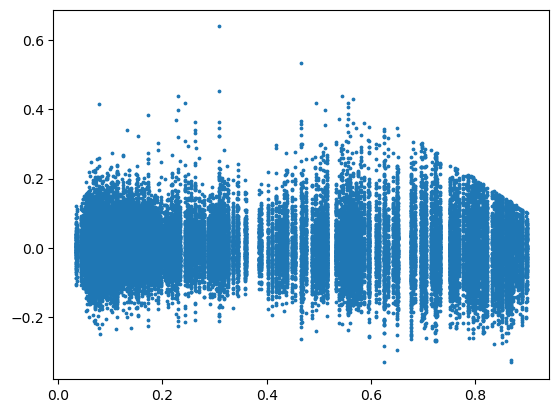

In [64]:
results2 = results[results.NDVI_unperturbed > 0]
plt.scatter(x=results2.NDVI_unperturbed, y=results2.NDVI_perturbation,s=3)
np.std(results2.NDVI_perturbation)